# Interpolate a GPS track

<br/>
<div class="alert alert-block alert-warning">
Les méthodes qui sur-échantillonnent, sous-échantillonnent ou ré-échantillonnent les traces et qui passent donc nécessairement par une modélisation / description complète de la trajectoire suivie. Lorsque la trace comporte des timestamps, on a alors suppression ou création de nouveaux timestamps. On peut donc considérer que ces méthodes modifient les observations, contrairement aux méthodes de lissage qui ne modifient que les géométries des observations. Il peut s'agir des méthodes locales (e.g. interpolation linéaire, bézier) ou globales (e.g. splines, krigeage, gaussian process...)
</div>

Ces méthodes ne sont sensées conserver les AF que pour un sous-échantillonnage strict. La porte d'entrée de base des méthodes d'interpolation dans Track est la fonction <b>resample</b>. 

## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as tkl

In [2]:
'''
Une fonction pour afficher la trace avec l'heure de passage
'''
def view_track():
    # Display point and time
    trace.plotAsMarkers()
    plt.text(trace[0].position.getX()+0.1, trace[0].position.getY()+0.1, '10:00')
    plt.text(trace[1].position.getX()+0.1, trace[1].position.getY()+0.1, '10:10')
    plt.text(trace[2].position.getX()+0.1, trace[2].position.getY()+0.1, '10:20')
    plt.text(trace[3].position.getX()+0.1, trace[3].position.getY()+0.1, '10:30')

    plt.xlim([-0.5, 7.0])
    plt.ylim([-1.5, 1.5])

### Construction de la trace

Longueur de la trace (en mètre):  3.0
Espace entre chaque intervalle (en mètre):  0.5


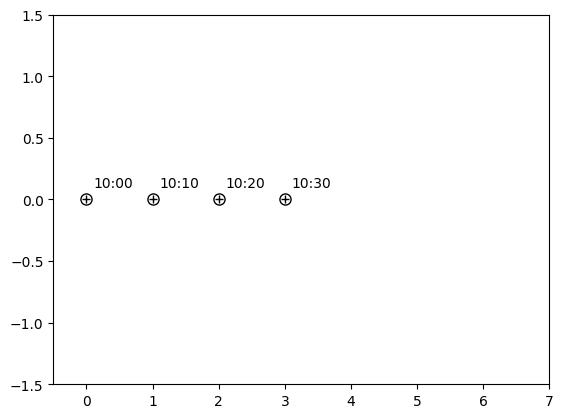

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")
trace = tkl.Track([], 1)
        
trace.addObs(tkl.Obs(tkl.ENUCoords(0.0,  0.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:00:00")))
trace.addObs(tkl.Obs(tkl.ENUCoords(1.0,  0.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:10:00")))
trace.addObs(tkl.Obs(tkl.ENUCoords(2.0,  0.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:20:00")))
trace.addObs(tkl.Obs(tkl.ENUCoords(3.0,  0.0, 0), tkl.ObsTime.readTimestamp("2018-01-01 10:30:00")))

view_track()

print ("Longueur de la trace (en mètre): ", trace.length())
print ("Espace entre chaque intervalle (en mètre): ", trace.length() / 6)

### Interpolation lineaire : sur-echantillonnage spatial facteur 2

/home/marie-dominique/tracklib/tracklib/tracklib/plot/plot.py:145: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(ymin, ymax)


(-1.5, 1.5)

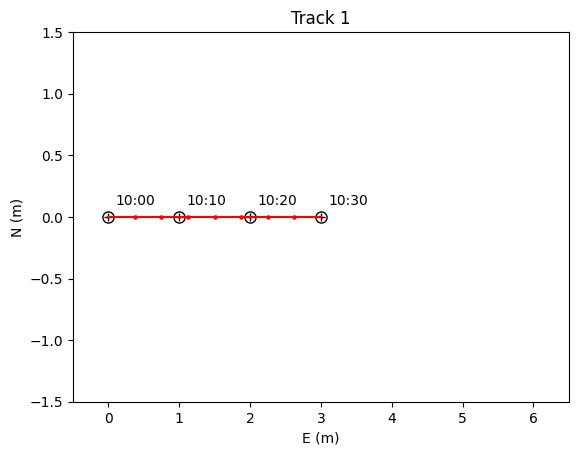

In [4]:
view_track()

trace1 = trace.copy()

trace1.resample(factor=2, mode=tkl.MODE_SPATIAL) 
trace1.plot('r-')
trace1.plot('ro')

plt.xlim([-0.5, 6.5])
plt.ylim([-1.5, 1.5])